In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import cv2
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Input,Sequential, Model
from keras.layers import Dense ,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
x_train=np.load('x_train.npy')
y_train=np.load('y_train.npy')
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(58650, 32, 32)
(58650, 1)
(19550, 32, 32)
(19550, 1)


In [3]:
x_train = x_train.reshape(-1,32,32,1)
x_train.shape

(58650, 32, 32, 1)

In [4]:
x_test = x_test.reshape(-1,32,32,1)
x_test.shape

(19550, 32, 32, 1)

In [5]:
batch_size=128
epochs=10
number_of_classes=46

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(32, 32, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

# optimizer:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv

In [7]:
trained_model = model.fit(x_train, y_train, epochs=epochs, 
                             batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 58650 samples, validate on 19550 samples
Epoch 1/10
58650/58650 [==============================] - 253s 4ms/step - loss: 0.8748 - acc: 0.7611 - val_loss: 0.2333 - val_acc: 0.9305
Epoch 2/10
58650/58650 [==============================] - 445s 8ms/step - loss: 0.1443 - acc: 0.9576 - val_loss: 0.1164 - val_acc: 0.9655
Epoch 3/10
58650/58650 [==============================] - 541s 9ms/step - loss: 0.0809 - acc: 0.9754 - val_loss: 0.1127 - val_acc: 0.9705
Epoch 4/10
58650/58650 [==============================] - 537s 9ms/step - loss: 0.0542 - acc: 0.9831 - val_loss: 0.0844 - val_acc: 0.9762
Epoch 5/10
58650/58650 [==============================] - 543s 9ms/step - loss: 0.0403 - acc: 0.9873 - val_loss: 0.0858 - val_acc: 0.9758
Epoch 6/10
58650/58650 [==============================] - 543s 9ms/step - loss: 0.0365 - acc: 0.9878 - val_loss: 0.0851 - val_acc: 0.9748
Epoch 7/10
58650/58650 [==============================] - 543s 9ms/step - 

# OOPS! I forgot to fit_transform Y into one hot vectors before train test split which is why I had to use sparse_categorical_crossentropy instead of simple categorical_crossentropy. So probably want to convert my y_train and y_test to categorical one-hot vectors, ie, via keras.utils.np_utils.to_categorical

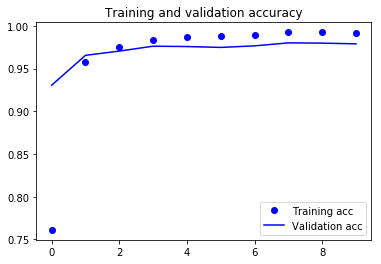

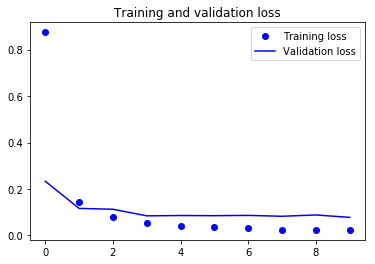

In [8]:
model.save('dvngri_1')

acc = trained_model.history['acc']
val_acc = trained_model.history['val_acc']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()